In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dev-comm-ml-recruitment/train.csv
/kaggle/input/dev-comm-ml-recruitment/test.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/kaggle/input/dev-comm-ml-recruitment/train.csv")
df2=pd.read_csv("/kaggle/input/dev-comm-ml-recruitment/test.csv")
df2


,id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,version,bright_t31,frp,daynight
0,1,-24.225,150.961,333.8,1.7,1.3,2019-12-18,320,Aqua,MODIS,6.0NRT,309.2,38.7,D
1,2,-31.417,151.815,330.8,1.0,1.0,2019-12-21,350,Aqua,MODIS,6.0NRT,309.8,17.2,D
2,3,-16.961,138.351,339.7,1.1,1.1,2019-12-17,420,Aqua,MODIS,6.0NRT,313.1,20.3,D
3,4,-33.443,150.172,319.6,1.0,1.0,2019-12-19,1505,Aqua,MODIS,6.0NRT,290.3,18.9,N
4,5,-36.970,147.286,347.6,1.0,1.0,2020-01-02,415,Aqua,MODIS,6.0NRT,303.4,54.9,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36714,36715,-16.933,143.232,336.1,1.4,1.2,2019-10-02,355,Aqua,MODIS,6.0NRT,315.7,19.5,D
36715,36716,-31.391,151.225,306.6,1.0,1.0,2019-12-18,1245,Terra,MODIS,6.0NRT,293.2,6.3,N
36716,36717,-36.244,147.678,390.9,1.0,1.0,2020-01-04,400,Aqua,MODIS,6.0NRT,329.9,182.7,D
36717,36718,-35.788,148.053,307.8,3.4,1.7,2020-01-03,1600,Aqua,MODIS,6.0NRT,293.5,48.9,N


In [5]:
df=df.drop('id',axis=1)
df=df.drop('instrument',axis=1)
df=df.drop('version',axis=1)
from sklearn.preprocessing import LabelEncoder
lbl1=LabelEncoder()
df['sat_name'] = lbl1.fit_transform(df['satellite'])
df['sat_name'] = df['satellite'].map({'Terra': 0, 'Aqua': 1})
df=df.drop('satellite',axis=1)
lbl2=LabelEncoder()
df['day_night'] = lbl2.fit_transform(df['daynight'])
df['day_night'] = df['daynight'].map({'N': 0, 'D': 1})
df=df.drop('daynight',axis=1)
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['day'] = df['acq_date'].dt.day
df['month'] = df['acq_date'].dt.month
df['year'] = df['acq_date'].dt.year
df=df.drop('acq_date',axis=1)
df

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,sat_name,day_night,day,month,year
0,-16.051,141.996,322.8,2.0,1.4,1335,100,298.5,42.8,0,0,3,12,2019
1,-32.855,150.711,335.0,1.2,1.1,405,84,305.4,29.1,1,1,3,12,2019
2,-12.216,132.732,346.1,1.4,1.2,435,90,312.3,52.1,1,1,12,10,2019
3,-32.991,150.507,358.8,1.0,1.0,350,99,313.7,68.8,1,1,19,11,2019
4,-12.938,136.140,324.4,1.0,1.0,1330,100,295.0,21.8,0,0,10,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,-16.123,142.859,334.1,1.0,1.0,410,69,303.7,19.8,1,1,19,12,2019
146870,-16.616,142.347,354.4,1.3,1.1,100,96,311.5,71.7,0,1,14,12,2019
146871,-24.957,149.431,326.7,1.8,1.3,1225,100,298.0,50.1,0,0,22,12,2019
146872,-37.641,149.433,364.6,2.4,1.5,2330,100,303.5,309.9,0,1,29,12,2019


In [6]:
X=df.drop('confidence',axis=1)
y=df['confidence']
X

,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,sat_name,day_night,day,month,year
0,-16.051,141.996,322.8,2.0,1.4,1335,298.5,42.8,0,0,3,12,2019
1,-32.855,150.711,335.0,1.2,1.1,405,305.4,29.1,1,1,3,12,2019
2,-12.216,132.732,346.1,1.4,1.2,435,312.3,52.1,1,1,12,10,2019
3,-32.991,150.507,358.8,1.0,1.0,350,313.7,68.8,1,1,19,11,2019
4,-12.938,136.140,324.4,1.0,1.0,1330,295.0,21.8,0,0,10,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,-16.123,142.859,334.1,1.0,1.0,410,303.7,19.8,1,1,19,12,2019
146870,-16.616,142.347,354.4,1.3,1.1,100,311.5,71.7,0,1,14,12,2019
146871,-24.957,149.431,326.7,1.8,1.3,1225,298.0,50.1,0,0,22,12,2019
146872,-37.641,149.433,364.6,2.4,1.5,2330,303.5,309.9,0,1,29,12,2019


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)


LinearRegression()

In [22]:
y_pred = regressor.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'R² score = {r2}')


R² score = 0.6208405943298856


In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)



RandomForestRegressor(n_estimators=50, random_state=0)

In [13]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'R² score = {r2}')


R² score = 0.6747206087075257


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

In [12]:
import xgboost as xgb 
xg_reg = xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 0.1, n_estimators = 5000) 
xg_reg.fit(X_poly,y_train) 

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, ...)

In [13]:
y_pred = xg_reg.predict(poly_reg.transform(X_test))

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'R² score = {r2}')


R² score = 0.7136516985430437


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


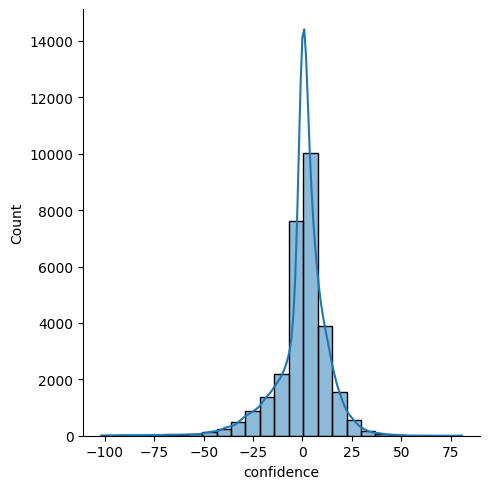

In [24]:
test_res=y_test-y_pred
sns.displot(test_res,bins=25,kde=True)

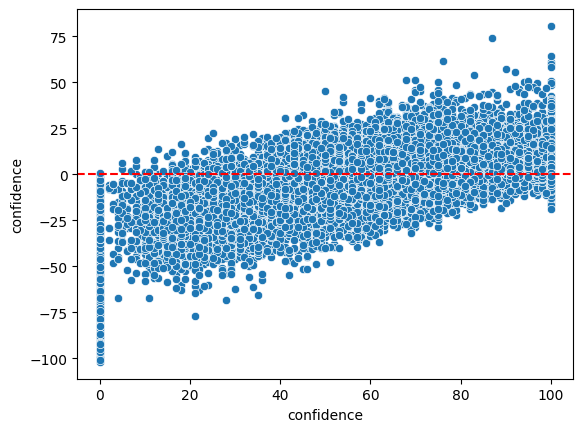

In [26]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
id=df2[["id"]]
df2=df2.drop('id',axis=1)
df2=df2.drop('instrument',axis=1)
df2=df2.drop('version',axis=1)
from sklearn.preprocessing import LabelEncoder
lbl3=LabelEncoder()
df2['sat_name'] = lbl2.fit_transform(df2['satellite'])
df2['sat_name'] = df2['satellite'].map({'Terra': 0, 'Aqua': 1})
df2=df2.drop('satellite',axis=1)
lbl4=LabelEncoder()
df2['day_night'] = lbl4.fit_transform(df2['daynight'])
df2['day_night'] = df2['daynight'].map({'N': 0, 'D': 1})
df2=df2.drop('daynight',axis=1)
df2['acq_date'] = pd.to_datetime(df2['acq_date'])
df2['day'] = df2['acq_date'].dt.day
df2['month'] = df2['acq_date'].dt.month
df2['year'] = df2['acq_date'].dt.year
df2=df2.drop('acq_date',axis=1)
df2


,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,sat_name,day_night,day,month,year
0,-24.225,150.961,333.8,1.7,1.3,320,309.2,38.7,1,1,18,12,2019
1,-31.417,151.815,330.8,1.0,1.0,350,309.8,17.2,1,1,21,12,2019
2,-16.961,138.351,339.7,1.1,1.1,420,313.1,20.3,1,1,17,12,2019
3,-33.443,150.172,319.6,1.0,1.0,1505,290.3,18.9,1,0,19,12,2019
4,-36.970,147.286,347.6,1.0,1.0,415,303.4,54.9,1,1,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36714,-16.933,143.232,336.1,1.4,1.2,355,315.7,19.5,1,1,2,10,2019
36715,-31.391,151.225,306.6,1.0,1.0,1245,293.2,6.3,0,0,18,12,2019
36716,-36.244,147.678,390.9,1.0,1.0,400,329.9,182.7,1,1,4,1,2020
36717,-35.788,148.053,307.8,3.4,1.7,1600,293.5,48.9,1,0,3,1,2020


In [21]:
X_final=df2


In [25]:
y_pred_test = xg_reg.predict(poly_reg.transform(X_final))

y_pred_test


array([64.89494 , 55.793846, 77.27779 , ..., 99.12661 , 66.121155,
       88.02556 ], dtype=float32)

In [26]:
submission=id
submission

,id
0,1
1,2
2,3
3,4
4,5
...,...
36714,36715
36715,36716
36716,36717
36717,36718


In [27]:
submission["Confidence"]=y_pred_test
submission

/tmp/ipykernel_34/1193123069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Confidence"]=y_pred_test


,id,Confidence
0,1,64.894943
1,2,55.793846
2,3,77.277786
3,4,100.657730
4,5,93.186920
...,...,...
36714,36715,53.238678
36715,36716,43.546543
36716,36717,99.126610
36717,36718,66.121155


In [28]:
submission.to_csv("submission.csv",index=None)